# Exploring Florence-2
### Multimodal AI with Unified Vision-Language Capabilities

**Florence-2** is a novel vision foundation model developed by Microsoft that is redefining the capabilities of artificial intelligence in the field of computer vision. This powerful model serves as a versatile backbone for a wide range of vision tasks, from image captioning and object detection to visual grounding (locating and identifying specific objects or regions within an image based on a natural language query) and referring expression comprehension (localizing a specific object within an image based on a natural language expression). Key features of Florence-2 include:

* Unified sequence-to-sequence architecture: Florence-2 employs a consistent underlying structure that can handle diverse vision tasks without the need for task-specific modifications, aligning with the principles of versatile model development.
* Unprecedented zero-shot and fine-tuning capabilities: The model achieves new state-of-the-art results in various tasks, even outperforming larger specialist models after fine-tuning with public human-annotated data.
* Multitask learning with extensive visual annotations: Florence-2 is trained on a comprehensive dataset, enabling it to learn intricate visual patterns and representations that can be applied to numerous domains.
* Prompt-based representation: The model uses a unified prompt-based approach to accommodate a wide range of vision tasks, addressing the challenges of limited training data and the absence of a unified architecture.
* Efficient solution for various tasks: Florence-2 can handle tasks from image-level understanding to fine-grained visual-semantic alignment without extensive fine-tuning, making it an ideal choice for practical applications.

By combining the power of multi-task learning and the seamless integration of textual and visual information, Florence-2 sets a new standard for comprehensive representation learning in computer vision. Its achievements pave the way for the future of vision foundation models, inspiring researchers to delve deeper into the realms of cross-modal understanding and adaptable AI systems.

### Introduction

I will never tire of highlighting that MS researchers have always had a pioneering attitude towards how to train/create models by reducing their size while simultaneously increasing their capabilities; papers on models like Orca 2, Phi-3, and Florence-2 serve as a sort of manual on data preparation for training lean and efficient models. These efforts are based not so much on the discovery of new architectures (note from the author: at the architectural level, despite significant diversifications over the years, we are still at 2017, the advent of the [Transformer](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture))) but on careful strategies that emphasize how to prepare training data and in what formats to input them into the models.

Achieving universal representation in computer vision poses distinct challenges due to the complexity of visual data. Key aspects include:

* **Spatial Hierarchy**: models must effectively interpret spatial details at different scales, balancing between high-level concepts and fine-grained pixel information.
* **Semantic Granularity**: successful universal representation should encompass a range of semantic details, from broad captions to intricate descriptions, facilitating diverse applications.

(All images from now on, except those in the coding section, are from the original Florence-2 [article](https://arxiv.org/pdf/2311.06242))

![image1](1.png)

To build a unified vision foundation model suitable for various applications, the authors propose an innovative pre-training strategy that overcomes single-task limitations and integrates both textual and visual semantics. Their approach incorporates a diverse set of annotations, effectively capturing visual understanding nuances and bridging the gap between vision and language understanding. This strategy aims to capture multiple levels of granularity, from global semantics to local details, and comprehend spatial relationships between objects and entities in their semantic context.

### Model and Data Engine

Florence-2 consists of an image encoder and standard multi-modality encoder-decoder. Florence-2 employs a sequence-to-sequence learning paradigm, integrating several tasks under a common language modeling objective. The model takes images coupled with task-prompt as task instructions, and generates the desirable results in text forms. Note how input image data is enriched with additional prompt info, and then encoded (see picture below).

![image2](2.png)

Florence-2 data engine consists of three essential phases:
1. initial annotation employing specialist models;
2. data filtering to correct errors and remove irrelevant annotations;
3. an iterative process for data refinement.

The final dataset **FLD-5B** consists of over 5B annotations containing 126M images, 500M text annotations, 1.3B region-text annotations, and 3.6B text-phrase-region annotations.

### Image Collection

Data is constructed by gathering a diverse collection of images from various sources. There are three key tasks that act as primary sources for
image corpus: image classification, object detection, and image captioning. Five distinct datasets originating from the aforementioned tasks: ImageNet-22k, Object 365, Open Images, Conceptual Captions, and LAION. This combination results in a dataset of 126 million images in total.

### Data Annotation Process

The primary goal of the data annotation process is to create comprehensive annotations that facilitate effective multitask learning. This process is divided into three main categories: text, region-text pairs, and text-phrase-region triplets. 

The annotation workflow consists of three essential phases:

1. **Initial Annotation**: This phase employs specialist models to generate initial annotations. These models are a mix of offline models trained on diverse datasets and online services tailored for specific annotation types. In cases where datasets already contain partial annotations, such as the Object 365 dataset, these are merged with synthetic labels to enhance coverage.

2. **Data Filtering and Enhancement**: Initial annotations, while comprehensive, can contain noise and inaccuracies. A multifaceted filtering process is implemented to refine these annotations:
   - **Text Annotations**: A parsing tool based on SpaCy is used to extract relevant objects, attributes, and actions. Texts with excessive objects are filtered out to reduce noise, and only those with a minimum complexity are retained.
   - **Region Annotations**: Noisy bounding boxes are removed based on a confidence score, and non-maximum suppression is applied to eliminate redundant boxes.

3. **Iterative Data Refinement**: Using the filtered annotations, a multitask model is trained, leading to improved predictions, especially in cases of inaccuracies. The updated annotations are integrated with the original ones for further training. For tasks initially omitted due to insufficient data, the iteratively trained model is used for pre-training, followed by fine-tuning with the sparse dataset, resulting in better performance than models trained from scratch.

This comprehensive approach ensures high-quality annotations across an extensive dataset of 126 million images, facilitating robust multitask learning and enhancing the overall annotation process. The data annotation process is depicted below.

![image3](3.png)

### Annotation-Specific Variations

This section elaborates on the variations in the annotation procedures for different types of data within the general workflow introduced earlier.

**Text annotations** categorize images into three granularities: brief, detailed, and more detailed. 

- **Brief Text**: Consists of a single sentence highlighting the most salient objects and activities, similar to COCO captions. A Florence-2 model is trained to generate these annotations, with iterative refinement to reduce noise.
  
- **Detailed and More Detailed Text**: Comprises multiple sentences that provide richer descriptions. These are generated using prompts from existing annotations fed into large language models (LLMs) or large multimodal models (LMMs). Due to the high cost, only a limited number of these texts are created to fine-tune the caption specialist.

**Region-text pairs** offer descriptive annotations for semantic regions in images, including both visual objects and text regions. Each region is represented by a bounding box and can be annotated with varying granularities.

- **Text Regions**: Labeled using Azure AI Services’ OCR API.
- **Visual Object Regions**: Initially annotated with a DINO object detector trained on public datasets. Data filtering techniques like confidence thresholding and non-maximum suppression are applied to remove noisy annotations. Each region receives three textual annotations: a phrase from the object category, brief text, and noun phrase chunks.

**Text-Phrase-Region Triplets**. These triplets consist of descriptive text, noun phrases related to image objects, and their corresponding region annotations. 

- The descriptive text includes brief, detailed, and more detailed annotations. The Grounding DINO model identifies noun phrases and generates bounding boxes, while the SAM model creates segmentation masks for precise localization. Data filtering applies a confidence score threshold to ensure relevance, and a blacklist is used to exclude irrelevant noun phrases.

This structured approach enhances the richness and accuracy of image annotations across various categories.

![image4](4.png)

In the picture above, an illustrative example of an image and its corresponding annotations in FLD-5B dataset. Each image in FLD-5B is annotated with text, region-text pairs, and text-phrase-region triplets by Florence data engine, which covers multiple spatial hierarchies, brief-to-detailed progressive granularity, and a wide semantics spectrum, enabling more comprehensive visual understanding from diverse perspectives.

### Coding example

To run the following code, you need a GPU supporting CUDA. Alternatively, you can run it on Google Colab or a similar hosted service.

In [ ]:
# Install basic libraries
%pip install transformers pillow timm flash_attn

In [2]:
# Importing modules
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline

In [ ]:
# Setting the model 
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [4]:
# Function generating text from prompt
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [5]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

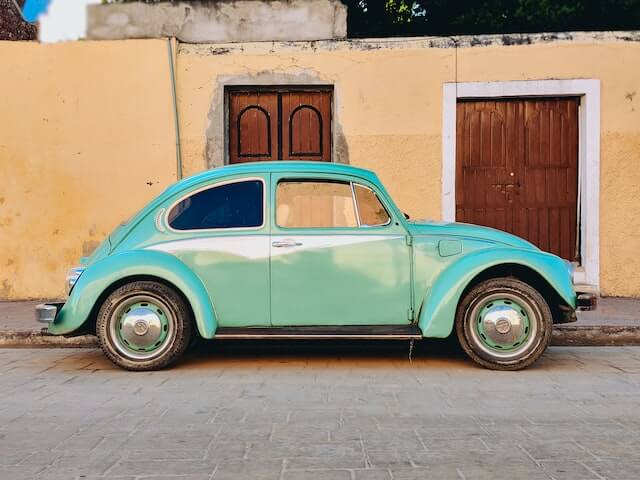

In [6]:
image

In [7]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A green car parked in front of a yellow building.'}

In [8]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a green Volkswagen Beetle parked in front of a yellow building with two brown doors. The sky is a mix of blue and white, and there are a few green trees in the background.'}

In [9]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': 'The image shows a vintage Volkswagen Beetle car parked on a cobblestone street in front of a yellow building with two wooden doors. The car is painted in a bright turquoise color and has a white stripe running along the side. It has two doors on either side of the car, one on top of the other, and a small window on the front. The building appears to be old and dilapidated, with peeling paint and crumbling walls. The sky is blue and there are trees in the background.'}

The output for **object detection** is textual, indicating various boxes and the respective labels.

In [10]:
# Object detection
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[34.23999786376953, 160.0800018310547, 597.4400024414062, 371.7599792480469], [456.0, 97.68000030517578, 580.1599731445312, 261.8399963378906], [450.8800048828125, 276.7200012207031, 554.5599975585938, 370.79998779296875], [95.68000030517578, 280.55999755859375, 198.72000122070312, 371.2799987792969]], 'labels': ['car', 'door', 'wheel', 'wheel']}}


You can get a visual output showing boxes and labels using the following function.

In [11]:
# Function drawing boxes and labels on image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

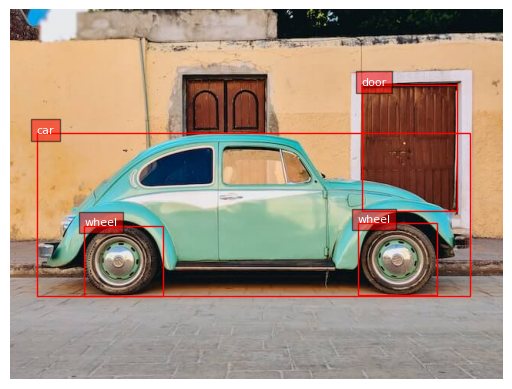

In [12]:
plot_bbox(image, results['<OD>'])

There really is much more to Florence-2's capabilities; however, we will stop here for brevity.

## Useful links

Original Florence-2 [article](https://arxiv.org/pdf/2311.06242)

Hugging Face "Florence-2-large" [page](https://huggingface.co/microsoft/Florence-2-large)